## Sentiment Analysis on Amazon Alexa

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

amazon_alexa_df = pd.read_csv("amazon_alexa.tsv", sep='\t')

In [45]:
amazon_alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [46]:
amazon_alexa_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [47]:
amazon_alexa_df = amazon_alexa_df[['rating','verified_reviews']]
print(amazon_alexa_df.shape)
amazon_alexa_df.head(20)

(3150, 2)


,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"Sometimes while playing a game, you can answer..."
3,5,I have had a lot of fun with this thing. My 4 ...
4,5,Music
5,5,I received the echo as a gift. I needed anothe...
6,3,"Without having a cellphone, I cannot use many ..."
7,5,I think this is the 5th one I've purchased. I'...
8,5,looks great
9,5,Love it! I’ve listened to songs I haven’t hear...


In [48]:
amazon_alexa_df = amazon_alexa_df[amazon_alexa_df['rating'] != '4 and 5']
print(amazon_alexa_df.shape)
amazon_alexa_df.head(20)

(3150, 2)


,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"Sometimes while playing a game, you can answer..."
3,5,I have had a lot of fun with this thing. My 4 ...
4,5,Music
5,5,I received the echo as a gift. I needed anothe...
6,3,"Without having a cellphone, I cannot use many ..."
7,5,I think this is the 5th one I've purchased. I'...
8,5,looks great
9,5,Love it! I’ve listened to songs I haven’t hear...


In [49]:
amazon_alexa_df["verified_reviews"].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                79
Love it!                                                                                                                                                                                                                                                                                                                             

In [50]:
sentiment_label = amazon_alexa_df.rating.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 Int64Index([5, 4, 3, 2, 1], dtype='int64'))

In [56]:
amazon_alexa = amazon_alexa_df.verified_reviews.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(amazon_alexa)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(amazon_alexa)
padded_sequence = pad_sequences(encoded_docs, maxlen=20)

In [57]:
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'to': 3, 'it': 4, 'and': 5, 'a': 6, 'my': 7, 'is': 8, 'for': 9, 'love': 10, 'echo': 11, 'this': 12, 'with': 13, 'of': 14, 'have': 15, 'great': 16, 'in': 17, 'that': 18, 'but': 19, 'alexa': 20, 'on': 21, 'so': 22, 'music': 23, 'not': 24, 'you': 25, 'like': 26, 'as': 27, 'up': 28, 'use': 29, 'can': 30, 'was': 31, 'we': 32, 'works': 33, 'all': 34, 'very': 35, 'one': 36, 'sound': 37, 'easy': 38, 'be': 39, 'just': 40, 'more': 41, 'set': 42, 'when': 43, 'me': 44, 'dot': 45, 'do': 46, 'good': 47, 'an': 48, 'are': 49, 'or': 50, 'product': 51, 'amazon': 52, 'has': 53, 'get': 54, 'speaker': 55, 'if': 56, 'she': 57, '34': 58, 'what': 59, 'would': 60, 'home': 61, 'play': 62, 'device': 63, 'had': 64, 'from': 65, 'still': 66, "it's": 67, 'am': 68, 'our': 69, 'time': 70, 'really': 71, 'will': 72, 'bought': 73, 'at': 74, 'other': 75, 'no': 76, 'smart': 77, 'out': 78, 'better': 79, 'new': 80, 'than': 81, 'now': 82, 'much': 83, 'prime': 84, 'also': 85, 'quality': 86, 'well': 87, 'fun'

In [58]:
print(amazon_alexa[0])
print(encoded_docs[0])

Love my Echo!
[10, 7, 11]


In [59]:
print(padded_sequence[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  7 11]


In [60]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           136160    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 152,811
Trainable params: 152,811
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 6s 21ms/step - loss: 0.6551 - accuracy: 0.3159 - val_loss: 0.6544 - val_accuracy: 0.5587
Epoch 2/5
79/79 [==============================] - 1s 14ms/step - loss: 0.0938 - accuracy: 0.6341 - val_loss: -0.1545 - val_accuracy: 0.7063
Epoch 3/5
79/79 [==============================] - 1s 13ms/step - loss: -0.9424 - accuracy: 0.6933 - val_loss: -0.5651 - val_accuracy: 0.6492
Epoch 4/5
79/79 [==============================] - 1s 13ms/step - loss: -1.9785 - accuracy: 0.7028 - val_loss: -0.5949 - val_accuracy: 0.6937
Epoch 5/5
79/79 [==============================] - 1s 14ms/step - loss: -3.3154 - accuracy: 0.7345 - val_loss: -1.2563 - val_accuracy: 0.5857


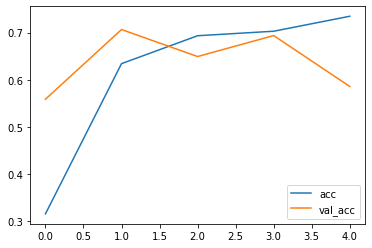

<Figure size 432x288 with 0 Axes>

In [62]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

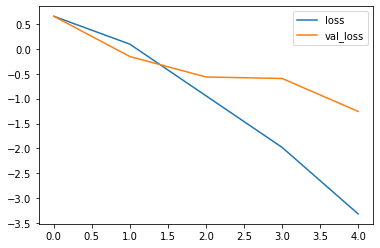

<Figure size 432x288 with 0 Axes>

In [63]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [64]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [65]:
test_sentence1 = "Love my Echo!."
predict_sentiment(test_sentence1)

test_sentence2 = "Without having a cellphone, I cannot use many!"
predict_sentiment(test_sentence2)

Predicted label:  4
Predicted label:  4
